# Explore data 

In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('factbook.db')
query = 'select * from facts limit 5'
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# Summary statistics 

In [6]:
query = '''select min(population), max(population), min(population_growth),
max(population_growth) from facts'''
pd.read_sql_query(query, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


# Outliers
* there's a country with a population of 0
* there's a country with a population of 7256490011 (or more than 7.2 billion people)

Let's zoom in on just these countries.

In [10]:
query = '''select * from facts
where population == (select min(population) from facts) '''
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [11]:
query = '''select * from facts
where population == (select max(population) from facts) '''
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0. This seems to match the CIA Factbook (no indigenous inhabitants, but there are both permanent and summer-only staffed research stations).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde58493438>,
      dtype=object)

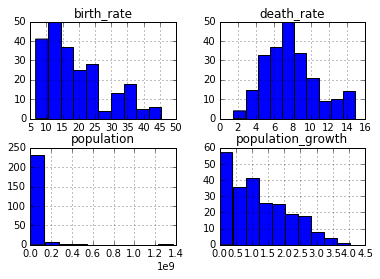

In [13]:
%matplotlib inline
query = '''select population, population_growth, birth_rate, death_rate
from facts
where population != (select min(population) from facts)
and population != (select max(population) from facts) '''
pd.read_sql_query(query, conn).hist()


In [23]:
query = '''select * from facts
where population > (select avg(population / cast(area_land as float)) from facts) '''
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,92436,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,43431886,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3056382,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,22751014,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8665550,0.55,9.41,9.42,5.56


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde4e08f9e8>]],
      dtype=object)

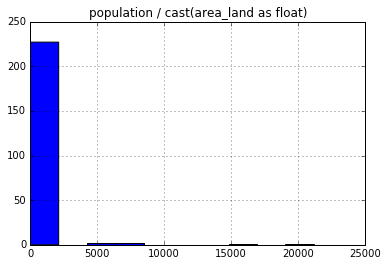

In [28]:
query = '''select population / cast(area_land as float) from facts'''
pd.read_sql_query(query, conn).hist()